#***SHALLOW LEARNING***#

HAY DOS GRANDES GRUPOS; SUPERVISED O UNSUPERVISED.

##1.- **SUPERVISED LEARNING.**
NECESITAN DATOS ETIQUETADOS. SI POR EJEMPLO ESTAMOS CLASIFICANDO IMAGENES
NECESITAMOS EJEMPLOS DE LAS IMAGENES Y LA CLASE QUE TENEMOS QUE DARLE A CADA
IMAGEN, ESTO LLEVA TIEMPO, ES DIFICIL, NECESITAS GENTE QUE HAGA ESO

###1.1 REGRESION.
####1.1.1. REGRESION LINEAL (PROYECTO 1)

###1.2 CLASIFICACION.
####1.2.1. REGRESION LOGISTICA (PROYECTO 2)
####1.2.2 KNN (PROYECTO 3)
####1.2.3. RANDOM FOREST (PROYECTO 4)

##2.- **UNSUPERVISED LEARNING.**
NO NECESITA DATOS ETIQUETADOS, SOLO CON DATOS NO ETIQUETADOS DE FORMA NO SUPERVISADA, ALGO APRENDEN TAMBIEN LOS ALGORITMOS.

###2.1 CLUSTERING. AGRUPAR DATOS EN DIFERENTES GRUPOS QUE PUEDAN SERVIR PARA RESOLVER UNA TAREA
####2.1.1. K-MEANS (PROYECTO 5)



---



# Proyecto 1: Regresion lineal.#

La regresión se utiliza para predecir un valor continuo en función de uno o más
valores de entrada. Un ejemplo de esto sería predecir el precio de una casa basado en características como su ubicación, el número de habitaciones, el tamaño del lote, etc. Los algoritmos de regresión intentan trazar una línea (o una superficie, en el caso de múltiples variables de entrada) que modela la relación entre las entradas y la salida. Los modelos de regresión más comunes incluyen la regresión lineal.

In [2]:
# Importamos las librerías

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget -O country_stats.csv https://raw.githubusercontent.com/CharlieScot/Inteligencia-Artificial/main/MODULO_4/country_stats.csv

--2024-01-05 08:42:03--  https://raw.githubusercontent.com/CharlieScot/Inteligencia-Artificial/main/MODULO_4/country_stats.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 715 [text/plain]
Saving to: ‘country_stats.csv’

country_stats.csv   100%[===================>]     715  --.-KB/s    in 0s      

2024-01-05 08:42:03 (41.5 MB/s) - ‘country_stats.csv’ saved [715/715]



In [ ]:
# Creamos Dataframe com Pandas leyendo del archivo csv

df=pd.read_csv('country_stats.csv')

df

,Pais,PIB per capita,Indice de felicidad
0,Russia,9054.914,6.0
1,Turkey,9437.372,5.6
2,Hungary,12239.893,4.9
3,Poland,12495.333,5.8
4,Slovak Republic,15991.736,6.1
5,Estonia,17288.083,5.6
6,Greece,18064.288,4.8
7,Portugal,19121.592,5.1
8,Slovenia,20732.482,5.7
9,Spain,25864.721,6.5


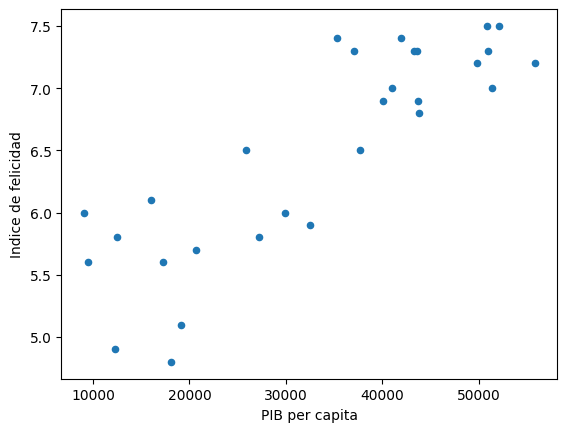

In [ ]:
# Visualización de la data usando la librería Matplotlib

df.plot(kind= 'scatter', x='PIB per capita', y='Indice de felicidad')

plt.show()

In [ ]:
# Parece que se ve una tendencia que indica que cuanto mayor es el PIB de un pais
# mas satisfecha esta la gente
# vamos a desarrollar un modelo que en base a estos datos nos permita saber para
# cualquier pais su nivel de satisfaccion, es una tarea de regresion
# vamos a usar un algoritmo muy simple que se basa en una regresion lineal, es
# una recta
# y= m*x + b

# y    variable que queremos predecir
# m
# x     PIB
# b

# tenemos que entrenar a este modelo para darle unos valores a los parametros
# que son la m y la b, que se ajusten a la tendencia que vemos en la grafica

# usamos la libreria de Scikit Learn

La ecuación general de una regresión lineal simple es:

$y = mx + b$

donde:

+   $y$ es la variable dependiente,
+   $x$ es la variable independiente,
+   $m$ es la pendiente de la línea (coeficiente de la variable independiente),
+   $b$ es el intercepto.

En términos prácticos, el intercepto indica el valor de $y$ cuando $x$ es igual a cero.

El intercepto en una regresión lineal es el valor en el eje vertical (eje y) donde la línea de regresión cruza o intercepta dicho eje.

In [ ]:
# Creación del modelo de Regresion Lineal usando la librería Sklearn y numpy

from sklearn import linear_model
import numpy as np

lin1 = linear_model.LinearRegression()

# A continuación, np.c_ se utiliza para concatenar las columnas del DataFrame
# df["PIB per capita"] y df["Indice de felicidad"] a lo largo del segundo eje.
# Esto es necesario porque lin1.fit espera que Xsample y ysample sean arreglos
# bidimensionales, y np.c_ se utiliza para realizar esta concatenación de
# manera conveniente.

Xsample = np.c_[df["PIB per capita"]]
ysample = np.c_[df["Indice de felicidad"]]
lin1.fit(Xsample, ysample)

# Se obtienen los coeficientes de la ecuación de regresión lineal. b representa
# la ordenada al origen (intercepto), y m representa la pendiente de la línea.

b, m= lin1.intercept_[0], lin1.coef_[0][0]

# intercept_[0]:

# Aquí, intercept_ es un array unidimensional. Aunque este array generalmente
# contiene solo un elemento (especialmente en la regresión lineal simple), aún se
# almacena como un array.
# El uso de [0] es para acceder al primer elemento de este array unidimensional.

# coef_[0][0]:

# En este caso, coef_ es un array bidimensional. Esto se debe a que, incluso en
# una regresión lineal simple, la librería scikit-learn estructura los coeficientes
# para acomodar potencialmente múltiples variables predictoras (en la regresión
# lineal múltiple). El primer [0] accede a la primera fila de este array bidimensional,
# que corresponde a los coeficientes de la primera variable predictora (en regresión
# lineal simple, es la única variable).
# El segundo [0] accede al primer elemento de esta fila, que es el coeficiente de
# la variable predictora en un modelo de regresión lineal simple.


b, m

# Esto significa que el modelo predice el Índice de felicidad en función del PIB
# per cápita con estas constantes resultantes. El intercepto representa el valor
# estimado del Índice de felicidad cuando el PIB per cápita es cero, y el
# coeficiente indica el cambio en el Índice de felicidad por cada unidad de
# aumento en el PIB per cápita.

(4.8530528073310295, 4.911544598433898e-05)

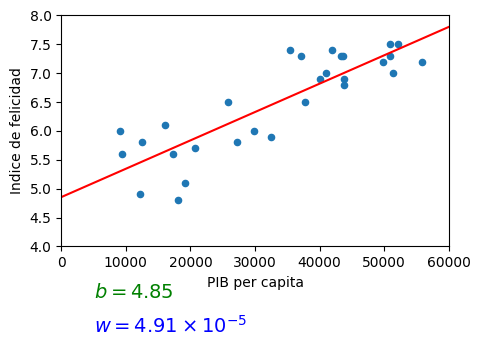

In [ ]:
df.plot(kind='scatter', x="PIB per capita", y='Indice de felicidad', figsize=(5,3))
plt.axis([0, 60000, 4, 8])
X=np.linspace(0, 60000, 1000)
plt.plot(X, b + m*X, "r")
plt.text(5000, 3.1, r"$b = 4.85$", fontsize=14, color="g")
plt.text(5000, 2.5, r"$w = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

In [ ]:
#vamos a usar nuestro algoritmo para predecir el nivel de satisfaccion de
#cualquier pais del que sepamos su PIB

cyprus_pib_per_capita = 22587
cyprus_predicted_indice_felicidad = lin1.predict([[cyprus_pib_per_capita]])[0][0]
cyprus_predicted_indice_felicidad

5.962423385779294

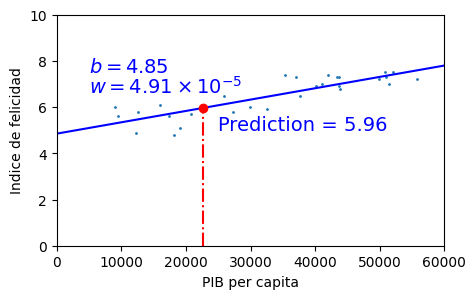

In [ ]:
df.plot(kind='scatter', x="PIB per capita", y='Indice de felicidad', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, b + m*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, "$b = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$w = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_pib_per_capita, cyprus_pib_per_capita], [0, cyprus_predicted_indice_felicidad], "r-.")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_pib_per_capita, cyprus_predicted_indice_felicidad, 'ro')
plt.show()



---



# Proyecto 2: Clasificación - Regresión Logística.

La clasificación es un tipo de problema en el que el objetivo es predecir una
categoría o clase a partir de uno o más valores de entrada. Un ejemplo común es el filtro de spam de un proveedor de correo electrónico, que clasifica los correos electrónicos como "spam" o "no spam" basándose en una serie de características del correo electrónico. Algunos de los algoritmos más comunes para los problemas de clasificación incluyen las máquinas de vectores de soporte, los árboles de decisión y las redes neuronales.

In [ ]:
# La regresión logística en scikit-learn se considera un modelo de clasificación.
# Aunque el término "regresión" está presente en su nombre, la regresión logística
# se utiliza principalmente para problemas de clasificación binaria o multiclase.

# La regresión logística estima la probabilidad de que una instancia pertenezca a
# una clase específica utilizando una función logística o sigmoide.
# A partir de esta probabilidad estimada, se toma una decisión de clasificación
# asignando la instancia a la clase con la probabilidad más alta.

# En el caso del dataset Iris en scikit-learn, la regresión logística se puede
# utilizar para clasificar las flores en diferentes especies utilizando las
# características disponibles en el conjunto de datos.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


#cargamos el dataset Iris
iris = load_iris()
X = iris.data    #las 4 caracteristicas
y = iris.target   #las 3 etiquetas diferentes

# El dataset Iris contiene mediciones de características de tres especies de
# flores: setosa, versicolor y virginica. Cada muestra del dataset tiene cuatro
# características: longitud y ancho del sépalo, y longitud y ancho del pétalo.




In [ ]:
# dividimos los datos en conjuntos de entrenamiento y prueba usando la funcion
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Creamos una instancia del modelo de regresion logistica y lo entrenamos usando
#la funcion fit().
#Crear una instancia de un modelo algorítmico en el contexto del aprendizaje
#automático es similar a crear un objeto de una clase en Python.

logreg=LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#realizamos prediccion en el conjunto de prueba usando la funcion predict()

y_pred=logreg.predict(X_test)

La evaluación de un modelo de machine learning es un paso esencial para entender
cómo de bien está funcionando. Dependiendo de si tu modelo es de clasificación,
regresión o algún otro tipo de modelo, hay diferentes métricas que puedes usar.



*   ***Precisión (Accuracy)***: Es la proporción de predicciones correctas sobre
el total de predicciones. Es una métrica útil cuando las clases están
bien balanceadas.
*   ***Recall (Sensitivity o True Positive Rate)***: Es la proporción de verdaderos
positivos que se identificaron correctamente. Es útil en situaciones
donde los falsos negativos son más preocupantes que los falsos
positivos.
*   ***Precision***: Es la proporción de verdaderos positivos entre todas las
predicciones positivas. Es útil en situaciones donde los falsos
positivos son más preocupantes que los falsos negativos.
*   ***F1 Score***: Es la media armónica de Precision y Recall. Intenta equilibrar
ambas métricas y es más útil que la precisión cuando tienes una
distribución de clases desequilibrada.



Una matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un modelo de clasificación en problemas de aprendizaje supervisado. Es especialmente útil cuando se trata de problemas de clasificación binaria, aunque también se puede extender a problemas de clasificación multiclase.

La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas realizadas por un modelo en cada clase. La estructura básica de la matriz de confusión es la siguiente:

**Verdaderos Positivos (TP) ⇒
Falsos Negativos (FN) ⇒
Falsos Positivos (FP) ⇒
Verdaderos Negativos (TN)**


*   ***Verdaderos Positivos (TP)***: Son las instancias que el modelo ha clasificado correctamente como positivas.
*   ***Falsos Negativos (FN)***: Son las instancias que el modelo ha clasificado incorrectamente como negativas cuando son positivas.
*   ***Falsos Positivos (FP)***: Son las instancias que el modelo ha clasificado incorrectamente como positivas cuando son negativas.
*   ***Verdaderos Negativos (TN)***: Son las instancias que el modelo ha clasificado correctamente como negativas.


In [ ]:
#evaluamos el rendimiento del modelo mediante alguna metrica como
#por ejemplo la precision (accuracy)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# Creamos la matriz de confusión.

# Fila 1 (Clase 0):

# 10 se refiere a los casos en los que el modelo clasificó correctamente las
# instancias de la clase 0 como clase 0 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasificó incorrectamente las
# instancias de la clase 0 como alguna otra clase (falsos negativos).

# Fila 2 (Clase 1):

# 9 se refiere a los casos en los que el modelo clasificó correctamente las
# instancias de la clase 1 como clase 1 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasificó incorrectamente las
# instancias de la clase 1 como alguna otra clase (falsos negativos).

# Fila 3 (Clase 2):

# 11 se refiere a los casos en los que el modelo clasificó correctamente las
# instancias de la clase 2 como clase 2 (verdaderos positivos).
# 0 se refiere a los casos en los que el modelo clasificó incorrectamente las
# instancias de la clase 2 como alguna otra clase (falsos negativos).


matriz_confusion=confusion_matrix(y_test, y_pred)
print(matriz_confusion)

# Esta matriz de confusión sugiere que el modelo ha realizado clasificaciones
# perfectas para las tres clases, sin errores de clasificación, ya que todos los
# valores fuera de la diagonal principal son ceros. Esto es un resultado ideal en
# términos de clasificación.

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


En scikit-learn, el método ***score*** de un modelo de regresión logística se utiliza para calcular la precisión del modelo en un conjunto de datos dado. Este método está disponible en los estimadores de clasificación, incluida la regresión logística.

La precisión se define como la fracción de muestras correctamente clasificadas sobre el total de muestras. Para modelos de clasificación, el método ***score*** devuelve la precisión por defecto.

In [ ]:
logreg.score(X_test, y_test)

1.0



---



# Proyecto 3: Clasificación - K Nearest Neighbors (Predicción de digitos en imágenes).

In [ ]:
from sklearn import datasets, neighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#Cargando el dataset de digitos

digits=datasets.load_digits()   # Se crea un objeto sklearn con un dataset integrado en la librería.

In [ ]:
# La propiedad DESCR describe el objeto de sklearn y lo que contiene, incluyendo
# el número de instancias, de atributos y de información.

digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [ ]:
#Dividiendo los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)


In [ ]:
#Creando el clasificador KNN

knn= neighbors.KNeighborsClassifier(n_neighbors=7)


In [ ]:
#Entrenando el clasificador
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Realizando predicciones
y_pred=knn.predict(X_test)

y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       7, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 3, 4, 1, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 1, 9, 3, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

El método `knn.score()` de la biblioteca scikit-learn en Python se utiliza para evaluar el rendimiento de un modelo de clasificación KNN. El método toma como entrada un conjunto de datos de prueba y devuelve una puntuación que indica la precisión del modelo en la clasificación de los datos de prueba.

El método `knn.score()` funciona de la siguiente manera:

1.   Para cada punto de datos de prueba, el método calcula la distancia entre ese punto y todos los puntos de datos de entrenamiento.
2.   El método selecciona los k puntos de datos de entrenamiento más cercanos al punto de prueba.
3.   El método utiliza la clase mayoritaria de los k puntos de entrenamiento más cercanos para clasificar el punto de prueba.

Por ejemplo, si un modelo KNN tiene un valor de `k = 7`, el método `knn.score()` clasificará un punto de prueba como positivo si la mayoría de los 7 puntos de entrenamiento más cercanos son positivos.

El valor devuelto por la función `score()` es un número entre `0` y `1`, donde `1` indica una precisión perfecta (todas las predicciones son correctas) y `0` indica que ninguna predicción es correcta.

In [ ]:
#Evaluando el clasificador
accuracy=knn.score(X_test, y_test)

accuracy

0.9777777777777777

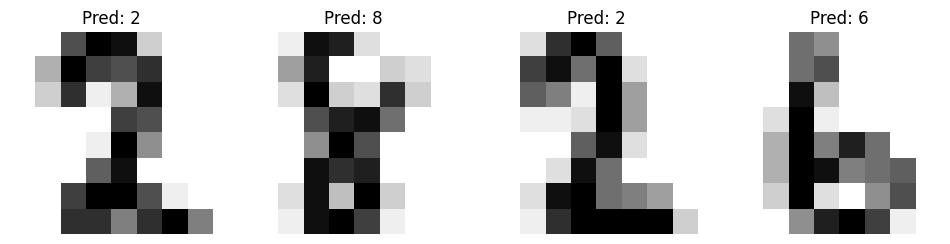

In [ ]:
#Visualizacion de algunos digitos del conjunto de prueba
images_and_predictions=list(zip(X_test, y_pred))
plt.figure(figsize=(12, 3))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
  plt.subplot(1,4, index+1)
  plt.axis('off')
  plt.imshow(image.reshape(8,8,), cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title(f'Pred: {prediction}')

In [ ]:
plt.suptitle(f'KNN Classifier Predictions(Accuracy:{accuracy:.2f})')
plt.show()

<Figure size 640x480 with 0 Axes>



---



# Proyecto 4: KNN (Detección de Cáncer de Mama)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predecir los resultados para el conjunto de prueba
y_pred = knn.predict(X_test)

In [ ]:
# Calcular la precisión del modelo

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9590643274853801

In [ ]:
# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[ 59,   4],
       [  3, 105]])

Precisión del modelo: 0.9590643274853801


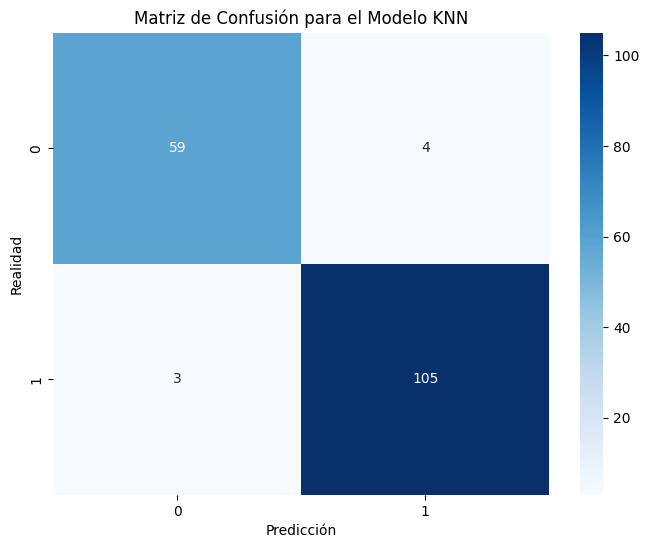

In [ ]:
#Mostrar la precisión y la matriz de confusión
print("Precisión del modelo:", accuracy)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión para el Modelo KNN')
plt.show()



---



# Proyecto 5: KNN (Clasificación de vinos)

In [ ]:
# Clasificación:
# Identificar a qué categoría pertenece un objeto.
# Aplicación: Detección de spam. ¿Es spam o no? ¿Es un buen vino o no?

# Regresión:
# Predecir un atributo asociado con un objeto.
# Aplicación: predicción de precios de acciones, pronóstico del tiempo.

# Agrupación:
# Agrupación automática de objetos similares en conjuntos.
# Aplicación: Segmentación de clientes, si a estos clientes les gusta esto, tal vez
# les gusta eso.

# Selección de modelo:
# Comparar, validar y elegir parámetros y modelos.
# Aplicación: mejorar la precisión del modelo mediante el ajuste de parámetros.

# Reducción de dimensionalidad:
# Reducir el número de variables aleatorias a considerar.
# Aplicación: Para aumentar la eficiencia del modelo.

# Preprocesamiento:
# Extracción y normalización de características.
# Aplicación: Transformar datos de entrada, como texto, para usarlos con la máquina.

# Algoritmos de aprendizaje.

In [ ]:
#Modelos más usados;

# Linear model
# SVM classifier
# Nearest neighbours KNN
# Decision trees
# Neural networks
# Forest

In [ ]:
# Importando los paquetes necesarios.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Importamos SGDClassifier de sklearn.linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
# Mejor para que no falle en el google colab!

In [ ]:
!wget -O winequality-red.csv https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRR7DZWHDPT36RAU7GZLIPLCQ

--2024-01-05 10:04:47--  https://raw.githubusercontent.com/CharlieScot/Intelligencia-Artificial/main/MODULO_4/winequality-red.csv?token=GHSAT0AAAAAACK7WEBRR7DZWHDPT36RAU7GZLIPLCQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.002s  

2024-01-05 10:04:47 (43.6 MB/s) - ‘winequality-red.csv’ saved [100951/100951]



In [ ]:
wine=pd.read_csv('winequality-red.csv', sep=',')

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Preprocesamiento de datos.

bins= (2, 6.5, 8)
group_names= ['bad', 'good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)   # La función cut() agrupa los valores en intervalos discretos.
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

A continuación, se utiliza `LabelEncoder() que es una clase en la biblioteca scikit-learn de Python que se utiliza para convertir etiquetas de clases categóricas en números.

In [ ]:


label_quality = LabelEncoder()

En el siguiente snippet, asignamos etiquetas numéricas (0, 1) a nuestra variable "calidad" (quality). El método `fit_transform()` de la clase `LabelEncoder` ajusta el codificador a las categorías y luego transforma las categorías en números. Como solo tenemos dos grupos (*bad y good*), se asignan los valores `0` y `1`.

In [ ]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

# Malos se convierten en O y buenos en 1

In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
# Contamos los diferentes valores que hay en cada categoria de la
# variable 'quality'.

wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

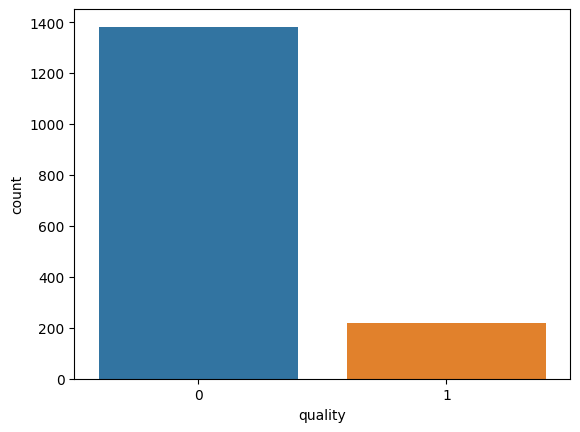

In [ ]:
sns.countplot(wine, x=wine['quality'])

In [ ]:
# Ahora separamos el conjunto de datos como variable de respuesta y variables de
# características.

X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
# Entrenar y probar la división de datos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Aplicamos el escalado standard para obtener los datos optimizados.
# La mayoria de los modelos necesitan scaling, los valores de nuestra base de
# datos son muy grandes comparados con otros y eso puede hacer que el modelo
# se concentre demasiado en los valores grandes.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [ ]:
#ahora los valores estan menos dispersos y oscilan entre -2 y 4 mas o menos.

X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587



---


# Proyecto 6: Clasificación - Random Forest (sobre el proyecto clasificación de Vinos).

Random Forest (Bosque Aleatorio) es un algoritmo de aprendizaje supervisado que se utiliza tanto para tareas de clasificación como para regresión. Pertenece a la categoría de métodos de conjunto (ensemble methods), que combinan varios modelos para mejorar el rendimiento y la generalización del modelo.

Aquí hay algunas características clave del algoritmo Random Forest:

1.  **Construcción de Árboles de Decisión**: Cada árbol de decisión en el bosque se construye utilizando una muestra aleatoria del conjunto de datos de entrenamiento. Además, en cada paso de la construcción del árbol, se selecciona aleatoriamente un subconjunto de características para elegir la mejor división. Esto ayuda a decorrelacionar los árboles y mejorar la generalización del modelo.

2.   **Votación o Promedio**: En el caso de clasificación, cada árbol en el bosque emite una predicción de clase y la clase final se determina por votación. En el caso de regresión, las predicciones de los árboles se promedian para obtener la predicción final.

3.   **Manejo de Overfitting**: Al construir múltiples árboles y combinar sus resultados, Random Forest tiende a ser más robusto y menos propenso al sobreajuste (overfitting) en comparación con un solo árbol de decisión.

4.   **Importancia de las Características**: Random Forest proporciona una medida de la importancia de cada característica en el proceso de toma de decisiones. Esto puede ser útil para la selección de características y la comprensión del modelo.

5.    **Versatilidad**: Random Forest es versátil y se puede aplicar a una variedad de problemas, incluyendo clasificación y regresión. Además, es menos propenso a sobreajuste que un árbol de decisión único.

Para utilizar Random Forest en scikit-learn, puedes usar la clase `RandomForestClassifier` para problemas de clasificación o `RandomForestRegressor` para problemas de regresión. Estas implementaciones permiten ajustar el número de árboles en el bosque, así como otros parámetros importantes.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# El parámetro n_estimators en el contexto de los algoritmos Random Forest
# indica el número de árboles que se deben construir en el bosque. Cada árbol
# en el bosque se construye utilizando una muestra aleatoria del conjunto de
# datos de entrenamiento, y el parámetro n_estimators controla cuántos de estos
# árboles se construirán.

rfc = RandomForestClassifier(n_estimators=200)


# Se utiliza la función cross_val_score() para realizar la validación cruzada
# k-fold con k=5. Esta función toma el clasificador, las características (X),
# las etiquetas (y), y el número de folds (cv) como argumentos.
# Devuelve una matriz de puntuaciones, donde cada elemento es la puntuación del
# modelo en un fold específico.

scores = cross_val_score(rfc, X, y, cv=200)

In [ ]:
print("Precisión en cada fold:", scores)
print("Precisión media:", scores.mean())

Precisión en cada fold: [0.875 0.875 0.875 0.875 0.875 0.875 1.    0.875 1.    1.    0.875 0.875
 1.    1.    0.875 0.875 1.    1.    1.    0.875 1.    1.    1.    1.
 1.    0.875 0.875 0.875 0.875 0.875 1.    0.875 1.    1.    1.    0.875
 1.    0.875 1.    0.875 0.875 1.    0.875 1.    0.875 0.875 0.875 0.75
 0.75  0.875 1.    1.    0.75  1.    1.    0.875 1.    1.    1.    0.875
 0.875 0.875 1.    1.    1.    1.    0.875 0.875 0.875 0.875 0.875 0.875
 0.875 1.    0.875 1.    0.875 0.875 0.875 0.875 0.875 1.    1.    0.875
 1.    1.    0.875 0.875 1.    1.    0.875 0.875 0.875 0.875 0.875 0.875
 1.    1.    0.875 1.    1.    1.    1.    1.    1.    1.    0.875 0.875
 1.    1.    0.875 0.875 0.75  1.    0.75  0.625 1.    0.875 1.    1.
 0.75  0.875 1.    0.875 0.875 0.75  0.75  0.875 0.875 0.875 1.    0.625
 0.875 0.875 0.875 1.    1.    1.    0.875 0.875 1.    0.875 1.    0.875
 0.875 0.875 0.875 0.75  0.75  1.    1.    0.875 1.    0.875 0.875 1.
 1.    1.    0.75  1.    1.    0.75  

In [ ]:
# Entrenamos el modelo con el método fit().

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
X_test[:10]

array([[-0.33399129,  0.24258119, -0.96313679,  0.02140418,  0.83730066,
        -0.16962178,  0.00884052,  0.23074469, -0.44256111,  0.0634928 ,
        -0.75508835],
       [-0.27864317, -0.09492307, -0.49458376, -0.6712254 , -0.04244065,
         0.46521996,  1.72151211, -0.31812766,  0.51996419, -1.15964614,
        -0.84471308],
       [ 1.32645219,  0.86133899, -0.23427652,  0.17532186,  0.64485725,
         0.10245325, -0.35816054,  1.87736173, -0.1858877 ,  2.23796204,
        -0.48621416],
       [ 0.10879364, -0.31992591,  0.23427652, -0.17099293, -0.15240831,
         1.46282842,  0.37584158,  0.67982206,  0.13495407, -0.75193316,
        -0.57583889],
       [-0.88747245, -0.31992591, -0.13015362, -0.59426656, -0.17990022,
         0.19314493, -0.35816054, -0.91689749,  0.51996419, -0.34422018,
         0.14115895],
       [-0.61073187, -0.60117946,  0.18221507, -0.28643119, -0.01494873,
         1.73490345,  0.80400947,  0.1808472 ,  0.84080596, -0.88783749,
        -0.934

La función `classification_report()` de scikit-learn proporciona un informe detallado de diversas métricas de evaluación del rendimiento de un modelo de clasificación. Este informe incluye métricas como `precision`, `recall`, `F1-score` y `support` para cada clase del problema de clasificación.

Os doy una explicación simple de las métricas que se incluyen en el `classification_report`:

`Precision` (Precisión): Es la proporción de instancias positivas correctamente clasificadas respecto al total de instancias clasificadas como positivas. Mide la exactitud de las predicciones positivas. Valores entre `0` (impreciso) y `1`(Precisión) .

`Recall` (Sensibilidad o Tasa de Verdaderos Positivos): Es la proporción de instancias positivas correctamente clasificadas respecto al total de instancias que son realmente positivas. Mide la capacidad del modelo para capturar todas las instancias positivas. Valores entre `0` (Baja sensibilidad) y `1` (Alta sensibilidad).

`F1-score`: Es la media armónica ponderada de precisión y recall. Proporciona un equilibrio entre ambas métricas y es útil cuando hay un desequilibrio entre las clases. Valores entre `0` (Desequilibrio) y `1` (Equilibrio).

`Support` (Soporte): Es el número real de ocurrencias de las clases en el conjunto de datos de prueba.

In [ ]:
# Veamos el desempeño de nuestro modelo.

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320



In [ ]:
# Matriz de confusión para la clasificación aleatoria de bosques.

# Vemos que el modelo es bueno prediciendo vino malo (263,10) pero el modelo es
# malo prediciendo vino bueno (32, 15).

print(confusion_matrix(y_test, pred_rfc))

[[265   8]
 [ 28  19]]


In [ ]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)

cm

0.8875

In [ ]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
# Probando un ejemplo.

Xnew = [[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]
ynew = rfc.predict(Xnew)

In [ ]:
print('La calidad del vino con los parámetros dados es:', ynew)

La calidad del vino con los parámetros dados es: [0]


# Proyecto 7: Clusterización.

**K-means** es un algoritmo de aprendizaje automático que se utiliza para agrupar datos en diferentes grupos o "clusters". Imagina que tienes un montón de puntos en un papel y quieres agruparlos en diferentes círculos, donde cada círculo contiene puntos que están cerca entre sí. K-means hace algo similar con datos en un espacio multidimensional.

Aquí te explico cómo funciona de manera sencilla:

1.  **Número de Clusters** (*K*): Primero, decides cuántos grupos (clusters) quieres crear. Este número se llama "K".

2.  **Puntos Iniciales** (*Centroides*): El algoritmo selecciona al azar "K" puntos como los centros iniciales de estos grupos. Estos puntos se llaman centroides.

3.   **Asignación de Puntos a los Clusters**: Cada punto de tus datos se asigna al centroide más cercano. Esto forma grupos iniciales.

4.   **Actualizar Centroides**: Una vez todos los puntos están asignados, el algoritmo recalcula la posición de cada centroide como el centro (promedio) de todos los puntos asignados a ese cluster.

5.   **Repetir el Proceso**: El algoritmo repite los pasos 3 y 4, reasignando puntos a los centroides más cercanos y recalculando la posición de los centroides, hasta que los grupos no cambian mucho o se alcanza un número máximo de iteraciones.

El resultado es un conjunto de grupos donde los puntos dentro de cada grupo son lo más similares posible entre sí, y lo más diferentes posible de los puntos en otros grupos. Es útil para encontrar patrones naturales en los datos o para preagrupar datos antes de aplicar otros análisis más complejos.

IMPORTAR LIBRERIAS Y MODELO

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

GENERAR DATOS FICTICIOS CON NUMPY

La función `seed()` establece la semilla para el generador de números aleatorios a un número específico.

Al fijar la semilla del generador de números aleatorios, aseguras que los resultados sean reproducibles. Es decir, cada vez que ejecutes el código, obtendrás la misma secuencia de números aleatorios.

Esto es muy útil para depurar o para cuando quieres que los resultados de un experimento sean consistentes para su revisión o comparación.

In [4]:
np.random.seed(42)


La función `normal()` de NumPy es utilizada para generar muestras aleatorias de una distribución normal (o gaussiana).

Por ejemplo, `np.random.normal(0, 1, 10)` generaría un arreglo de 10 muestras aleatorias de una distribución normal con media 0 y desviación estándar 1.

Grupo 1: Jovenes que gastan poco

In [5]:
edad_grupo1=np.random.normal(25, 5, 100)
gasto_grupo1=np.random.normal(200, 30, 100)

Grupo 2: Edad media que gasto medio

In [6]:
edad_grupo2=np.random.normal(45, 5, 100)
gasto_grupo2=np.random.normal(300, 50, 100)

Grupo3: Mayores que gastan mucho

In [7]:
edad_grupo3=np.random.normal(65, 8, 100)
gasto_grupo3=np.random.normal(500, 50, 100)

En el  siguiente snippet, la función `np.concatenate()` se utiliza para unir los arrays de `edad_grupox` y `gasto_grupox` creados anteriormente.

Primero, combina los tres arrays de edad en uno solo (`edad`) y luego hace lo mismo con los tres arrays de gasto, resultando en un único array de gasto (`gasto`).

Después, `zip(edad, gasto)` toma los elementos correspondientes de los arrays `edad` y `gasto` y los agrupa en pares. Cada par consiste en un elemento de edad y el elemento correspondiente de gasto.

Por ejemplo, si `edad = [25, 30, 35]` y `gasto = [100, 150, 200]`, entonces la sentencia `list(zip(edad, gasto))` creará la lista `[(25, 100), (30, 150), (35, 200)]`.

In [8]:
edad=np.concatenate([edad_grupo1, edad_grupo2, edad_grupo3])
gasto=np.concatenate([gasto_grupo1, gasto_grupo2, gasto_grupo3])

X=np.array(list(zip(edad, gasto)))

In [14]:
X[:20]

array([[ 27.48357077, 157.53887774],
       [ 24.30867849, 187.38064032],
       [ 28.23844269, 189.7185645 ],
       [ 32.61514928, 175.93168192],
       [ 23.82923313, 195.16142865],
       [ 23.82931522, 212.1215257 ],
       [ 32.89606408, 256.58557704],
       [ 28.83717365, 205.23733438],
       [ 22.65262807, 207.72651172],
       [ 27.71280022, 197.76662253],
       [ 22.68291154, 142.43686354],
       [ 22.67135123, 199.20458374],
       [ 26.20981136, 201.8069063 ],
       [ 15.43359878, 273.89726337],
       [ 16.37541084, 194.22917106],
       [ 22.18856235, 209.04642027],
       [ 19.9358444 , 198.95864691],
       [ 26.57123666, 164.93965887],
       [ 20.45987962, 234.28468444],
       [ 17.93848149, 222.55799098]])

#### Aplicar KMeans

La función `fit()` en K-means realiza el proceso central de agrupación: encuentra los centroides de los clusters y asigna cada punto de entrada a un cluster, basándose en la cercanía a estos centroides. El resultado es un conjunto de datos dividido en grupos que pueden ser utilizados para análisis o toma de decisiones posteriores.

El atributo `cluster_centers_` de KMeans almacena la ubicación de los centroides de los clusters que se han encontrado durante la ejecución del algoritmo KMeans mediante la función `fit()`.

El atributo `labels_` proporciona información sobre la asignación de cada punto de datos a uno de estos clusters. Cada elemento en `labels_` es un entero que representa el índice del cluster al que ha sido asignado un punto de datos específico.

En resumen, el atributo `labels_` te dice a qué cluster pertenece cada punto de datos en tu conjunto.

In [9]:
kmeans=KMeans(n_clusters=3)   # Creamos un objeto KMeans y fijamos el número de clusters en 3
kmeans.fit((X))
centroids=kmeans.cluster_centers_
labels=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Visualizamos la matriz de los centroides

centroids

array([[ 26.15161608, 199.71292273],
       [ 63.90089022, 494.81285859],
       [ 44.86614241, 308.99865436]])

In [12]:
labels

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [28]:
# Visualizamos los primeros 20 arrays de la matriz X

X[:20]

array([[ 27.48357077, 157.53887774],
       [ 24.30867849, 187.38064032],
       [ 28.23844269, 189.7185645 ],
       [ 32.61514928, 175.93168192],
       [ 23.82923313, 195.16142865],
       [ 23.82931522, 212.1215257 ],
       [ 32.89606408, 256.58557704],
       [ 28.83717365, 205.23733438],
       [ 22.65262807, 207.72651172],
       [ 27.71280022, 197.76662253],
       [ 22.68291154, 142.43686354],
       [ 22.67135123, 199.20458374],
       [ 26.20981136, 201.8069063 ],
       [ 15.43359878, 273.89726337],
       [ 16.37541084, 194.22917106],
       [ 22.18856235, 209.04642027],
       [ 19.9358444 , 198.95864691],
       [ 26.57123666, 164.93965887],
       [ 20.45987962, 234.28468444],
       [ 17.93848149, 222.55799098]])

In [93]:
# Visualizamos el elemento 0 del array 1.

X[1][0]

24.308678494144075

In [25]:
# Visualizamos el elemento 1 del array 4.

X[4][1]

195.16142865001973

In [56]:
# Visualizamos el array 6 de la matriz X

X[:][6]

array([ 32.89606408, 256.58557704])

In [101]:
# Visualizamos los 20 primeros elementos de todas las filas del array X,
# de la matriz. El primer corchete representa las filas (con ':' seleccionamos
# todas las filas) y la columna 0 de la matriz X, que contiene los valores
# de la edad.
# Y el segundo corchete muestra los primeros 20 elementos ([:20]) de la columna
# 0 de la matriz X.
# El resultado devuelve un array con los 20 primeros elementos de la matriz X en
# la columna 0.

X[:, 0][:20]

array([27.48357077, 24.30867849, 28.23844269, 32.61514928, 23.82923313,
       23.82931522, 32.89606408, 28.83717365, 22.65262807, 27.71280022,
       22.68291154, 22.67135123, 26.20981136, 15.43359878, 16.37541084,
       22.18856235, 19.9358444 , 26.57123666, 20.45987962, 17.93848149])

In [102]:
# En este caso, estamos mostrando los 20 primeros elementos de la matriz X
# en la columna 1, que representan los valores de gasto.

X[:, 1][:20]

array([157.53887774, 187.38064032, 189.7185645 , 175.93168192,
       195.16142865, 212.1215257 , 256.58557704, 205.23733438,
       207.72651172, 197.76662253, 142.43686354, 199.20458374,
       201.8069063 , 273.89726337, 194.22917106, 209.04642027,
       198.95864691, 164.93965887, 234.28468444, 222.55799098])

In [36]:
centroids[:, 0]

array([26.15161608, 63.90089022, 44.86614241])

#### Graficar

Vaamos a explicar como funciona el bucle for incluido en el siguiente snippet:

1.   Entendiendo `X` y `labels`:

  `X` es el array que contiene nuestros datos. Cada fila en `X` representa una observación (peresona), y cada columna representa una característica de esa observación (en nuestro caso, la primera columna es '`edad`' y la segunda es '`gastos($)`').
`labels` es un array que contiene las etiquetas de clusters asignadas a cada observación en `X` por el algoritmo KMeans. Por ejemplo, si labels tiene un valor de 0 para la primera observación, significa que esa observación ha sido asignada al primer cluster.

2.   Filtrando Datos con labels==i:

   `labels==i` es una operación que compara cada elemento en `labels` con el valor `i` (donde i será 0, 1, o 2 en nuestro bucle).
El resultado de `labels==i` es un array de valores booleanos (`True` o `False`), donde cada valor es `True` si la etiqueta de cluster correspondiente es igual a `i`, y `False` si no lo es.

3.   Seleccionando Datos de `X`:

  Cuando usas `X[labels==i]`, estás seleccionando solo aquellas filas de `X` donde `labels==i` es `True`. Es decir, estás filtrando `X` para obtener solo las observaciones que han sido asignadas al cluster `i`.

4.   Accediendo a Columnas Específicas:

   Luego, `[:, 0]` y `[:, 1]` se usan para seleccionar columnas específicas del array filtrado `X[labels==i]`.
`[:, 0]` selecciona todos los elementos de la primera columna (que representa '`edad`') de las filas filtradas.
`[:, 1]` selecciona todos los elementos de la segunda columna (que representa '`gastos($)`') de las filas filtradas.

5.   Resultado:

   Por lo tanto, `X[labels==i][:, 0]` te da todas las edades de las observaciones que están en el cluster `i`.
Y `X[labels==i][:, 1]` te da todas las cantidades gastadas de las observaciones que están en el cluster `i`.

Cluster  1
[[ 27.48357077 157.53887774]
 [ 24.30867849 187.38064032]
 [ 28.23844269 189.7185645 ]
 [ 32.61514928 175.93168192]
 [ 23.82923313 195.16142865]
 [ 23.82931522 212.1215257 ]
 [ 28.83717365 205.23733438]
 [ 22.65262807 207.72651172]
 [ 27.71280022 197.76662253]
 [ 22.68291154 142.43686354]
 [ 22.67135123 199.20458374]
 [ 26.20981136 201.8069063 ]
 [ 16.37541084 194.22917106]
 [ 22.18856235 209.04642027]
 [ 19.9358444  198.95864691]
 [ 26.57123666 164.93965887]
 [ 20.45987962 234.28468444]
 [ 17.93848149 222.55799098]
 [ 32.32824384 223.73095841]
 [ 23.8711185  172.71837636]
 [ 25.33764102 242.08382933]
 [ 17.87625907 157.94446812]
 [ 22.27808638 217.60571281]
 [ 19.24503211 170.28391025]
 [ 26.87849009 183.01106811]
 [ 21.99680655 202.98954095]
 [ 23.54153125 184.89573038]
 [ 21.99146694 153.48009707]
 [ 34.26139092 202.05688924]
 [ 24.93251388 168.13088859]
 [ 19.71144536 214.20777292]
 [ 29.11272456 172.41727297]
 [ 18.89578175 246.49803215]
 [ 26.04431798 176.50240123]
 [ 

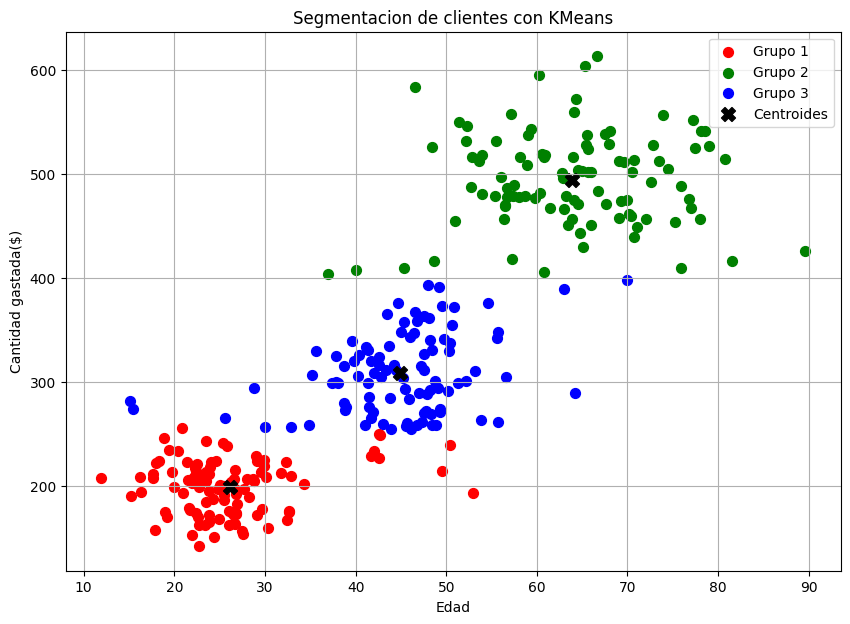

In [108]:
plt.figure(figsize=(10, 7))
colors=['r', 'g', 'b']
for i in range (3):
  plt.scatter(X[labels==i][:, 0], X[labels==i][:, 1], c=colors[i], label=f"Grupo {i+1}", s=50)
  print("Cluster ", i+1)
  print(X[labels==i])
  print("Edad: ",X[labels==i][:, 0], "Gastos:", X[labels==i][:, 1], sep="\n")
  print("-------------------------------------------------")
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroides')
plt.title('Segmentacion de clientes con KMeans')
plt.xlabel('Edad')
plt.ylabel('Cantidad gastada($)')
plt.legend()
plt.grid(True)
plt.show()